# Introduction

In this report, we’re looking at the hypothesis we’ve chosen to perform AB testing on HI website. The hypothesis chosen is: **partial visibility of additional page content (below banner)**.  
One of the factors influencing this decision is the assumption that current page design may contribute to users not scrolling,likely due to a full-sized hero banner.

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math

In [2]:
# Load the dataset
data = pd.read_csv("sample_data_pre-analysis_hyper_DA.csv")

In [3]:
# Calculating the Current Scroll Rate (Baseline Conversion Rate)
total_sessions = len(data)  # Total sessions
scrolled_sessions = data["scrolled_down"].sum()  # Users who scrolled
scroll_rate = scrolled_sessions / total_sessions  # Current scroll rate

In [4]:
print(f"total sessions ={total_sessions}")
print(f"Scrolled sessions ={scrolled_sessions}")
print(f"Scroll rate ={scroll_rate}")

total sessions =2000
Scrolled sessions =506
Scroll rate =0.253


In [5]:
# Define Expected Uplift & New Scroll Rate
expected_uplift = 0.40  # Assumption
target_scroll_rate = (scroll_rate * (1 + expected_uplift))  # Target expected scroll rate after uplift

In [11]:
# Step 3: Calculate Sample Size Using Z-Test Formula
alpha = 0.05  # Significance level (5% for a 95% confidence level)
beta = 0.20  # 1 - Power (80% power)
z_alpha = stats.norm.ppf(1 - alpha / 2)  # Z-score for 95% confidence
z_beta = stats.norm.ppf(1 - beta)  # Z-score for 80% power

In [13]:
print(f"z_alpha ={z_alpha:.2f}")
print(f"z_beta ={z_beta:.2f}")

z_alpha =1.96
z_beta =0.84


In [15]:
# Proportion calculation
p1 = scroll_rate  # Baseline scroll rate
p2 = target_scroll_rate  # Expected scroll rate after uplift
p = (p1 + p2) / 2 # proportion(Baseline and Target scroll rate)

In [17]:
print(f"Baseline scroll rate ={scroll_rate}")
print(f"Expected scroll rate after uplift = {target_scroll_rate:.2f}")
print(f"proportion = {p}")

Baseline scroll rate =0.253
Expected scroll rate after uplift = 0.35
proportion = 0.3036


In [19]:
# Sample size calculation formula
sample_size_per_variant = ((z_alpha * math.sqrt(2 * p * (1 - p)) + z_beta * math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))) ** 2) / ((p2 - p1) ** 2)
sample_size_per_variant = math.ceil(sample_size_per_variant)  # To round up to nearest whole number
total_sample_size = sample_size_per_variant * 2  # A/B test for both control & variant groups

In [21]:
print(f"sample_size_per_variant ={sample_size_per_variant}")
print(f"total_sample_size ={total_sample_size}")

sample_size_per_variant =323
total_sample_size =646


In [23]:
# Estimate Test Duration (Based on traffic)

# Calculate daily traffic from the dataset
daily_traffic = (total_sessions / len(data["session_date"].unique())) # Approximate daily visitors
test_duration_days = (total_sample_size / daily_traffic ) # Days required for the test

In [25]:
print(f"daily_traffic ={daily_traffic:.2f}")
print(f"test_duration_days ={test_duration_days:.2f}")

daily_traffic =35.71
test_duration_days =18.09


In [27]:
# Minimum detectable effect
MDE = (target_scroll_rate -scroll_rate)

In [29]:
# Standard Error
n1 = sample_size_per_variant
n2 = sample_size_per_variant
SE = math.sqrt(((p1 * (1 - p1))/n1) + ((p2 * (1 - p2))/n2))
print(f"standard error = {SE:.3f}")

standard error = 0.036


In [31]:
# Confidence Interval
CI_lower  = (p2 -p1) - (z_alpha * SE)
CI_upper  = (p2 -p1) + (z_alpha * SE)
print(f"Confidence intervals: ({CI_lower:.2f}, {CI_upper:.2f})")

Confidence intervals: (0.03, 0.17)


In [33]:
# Print the results
print(f"Current Scroll Rate: {scroll_rate*100:.2f}%")
print(f"Target Scroll Rate (after {expected_uplift*100}% uplift): {target_scroll_rate*100:.2f}%")
print(f"Sample Size per Variant: {sample_size_per_variant}")
print(f"Minimum detectable effect:{MDE:.2f}")
print(f"Total Sample Size (A + B): {total_sample_size}")
print(f"Estimated Test Duration (in days): {test_duration_days:.2f}")
print(f"Standard Error:{round(SE,4)}")
print(f"Confidence intervals: ({CI_lower:.2f}, {CI_upper:.2f})")

Current Scroll Rate: 25.30%
Target Scroll Rate (after 40.0% uplift): 35.42%
Sample Size per Variant: 323
Minimum detectable effect:0.10
Total Sample Size (A + B): 646
Estimated Test Duration (in days): 18.09
Standard Error:0.036
Confidence intervals: (0.03, 0.17)


### What could be a second iteration of this experiment if the result from the A/B test would give you a significant uplift? How could you improve it even further?

In [36]:
traffic_source_group = data.groupby("traffic_source")["session_date"].count()
traffic_source_group

traffic_source
Direct            501
Organic Search    693
Paid Ads          806
Name: session_date, dtype: int64

In [38]:
scroll_rate_source = data.groupby("traffic_source")["scrolled_down"].mean() * 100
scroll_rate_source

traffic_source
Direct            24.550898
Organic Search    25.252525
Paid Ads          25.806452
Name: scrolled_down, dtype: float64

In [40]:
# Combining the two into a single DataFrame
source_scroll_rate = pd.DataFrame({
    "visitors": traffic_source_group,
    "scroll rate (%)": round(scroll_rate_source,2)
})
source_scroll_rate.reset_index()

,traffic_source,visitors,scroll rate (%)
0,Direct,501,24.55
1,Organic Search,693,25.25
2,Paid Ads,806,25.81


In [42]:
device_type_group = data.groupby("device_type")["session_date"].count()
scroll_rate_decice_type = data.groupby("device_type")["scrolled_down"].mean() * 100
# Combining the two into a single DataFrame
device_scroll_rate = pd.DataFrame({
    "vsitors": device_type_group,
    "scroll rate (%)": round(scroll_rate_decice_type,2)
})
device_scroll_rate.reset_index()

,device_type,vsitors,scroll rate (%)
0,Desktop,797,16.06
1,Mobile,1203,31.42


In [44]:
# CTA
CTA_sessions = data["clicked_download_syllabus"].sum()  # Users who scrolled
CTA_rate = CTA_sessions / total_sessions  # Current scroll rate

In [46]:
print(f"total sessions ={total_sessions}")
print(f"CTA sessions ={CTA_sessions}")
print(f"CTA rate ={CTA_rate}")

total sessions =2000
CTA sessions =194
CTA rate =0.097


In [48]:
device_scroll_rate = data.groupby("device_type")["scrolled_down"].mean() * 100
device_CTA_rate = data.groupby("device_type")["clicked_download_syllabus"].mean() * 100

print(device_scroll_rate)
print(device_CTA_rate)

device_type
Desktop    16.060226
Mobile     31.421446
Name: scrolled_down, dtype: float64
device_type
Desktop    9.284818
Mobile     9.975062
Name: clicked_download_syllabus, dtype: float64


In [50]:
cta_and_scrolled = data[(data["clicked_download_syllabus"] == 1) & (data["scrolled_down"] == 1)]
cta_scroll_rate = len(cta_and_scrolled) / CTA_sessions

print(f"cta_scroll_rate ={cta_scroll_rate}")
print(f"total CTA ={CTA_sessions}")
print(f"total visitors(CTA AND scroll) ={len(cta_and_scrolled)}")
print(f"Percentage of CTA users who also scrolled: {cta_scroll_rate * 100:.2f}%")

cta_scroll_rate =0.5
total CTA =194
total visitors(CTA AND scroll) =97
Percentage of CTA users who also scrolled: 50.00%


In [52]:
# correlataion between scroll and CTA :
corr, p_value = stats.pearsonr(data["scrolled_down"], data["clicked_download_syllabus"])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.18621659607155194, P-value: 4.611831164356036e-17


# Results from the experiment:

In [55]:

print(f"Current Scroll Rate: {scroll_rate*100:.2f}%")
print(f"Target Scroll Rate (after {expected_uplift*100}% uplift): {target_scroll_rate*100:.2f}%")
print(f"Sample Size per Variant: {sample_size_per_variant}")
print(f"Minimum detectable effect:{MDE:.2f}")
print(f"Total Sample Size (A + B): {total_sample_size}")
print(f"Estimated Test Duration (in days): {test_duration_days:.2f}")
print(f"Standard Error:{round(SE,4)}")
print(f"Confidence intervals: ({CI_lower:.2f}, {CI_upper:.2f})")

Current Scroll Rate: 25.30%
Target Scroll Rate (after 40.0% uplift): 35.42%
Sample Size per Variant: 323
Minimum detectable effect:0.10
Total Sample Size (A + B): 646
Estimated Test Duration (in days): 18.09
Standard Error:0.036
Confidence intervals: (0.03, 0.17)


In [57]:
# Statistical significance test:

# Calculate Z-score
effect_size = target_scroll_rate - scroll_rate  # Difference in proportions
z_score = effect_size / SE

# Compute P-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# results
print(f"Effect size: {effect_size:.2f}")
#print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Check significance
if p_value < 0.05:
    print("Result is statistically significant.")
else:
    print("Result is NOT statistically significant.")

Effect size: 0.10
P-value: 0.0049
Result is statistically significant.


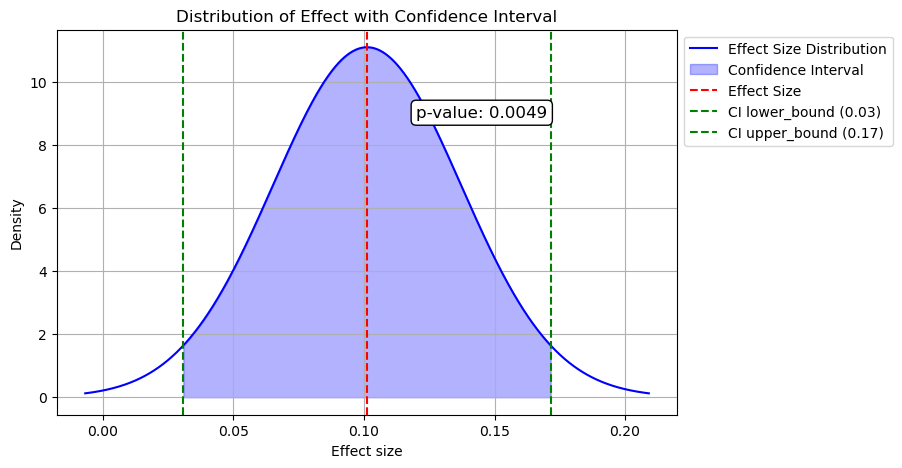

In [59]:
# Generate x values
x = np.linspace(-0.008, 0.208, 1000)
x = np.linspace(effect_size - (3*SE), effect_size +  (3*SE), 1000)

# Normal distribution for effect size
y = norm.pdf(x, effect_size, SE)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.lineplot(x=x, y=y, color="blue", label="Effect Size Distribution")

# Highlight confidence interval
plt.fill_between(x, y, where=(x >= CI_lower) & (x <= CI_upper), color="blue", alpha=0.3, label="Confidence Interval")

# Mark effect size
plt.axvline(effect_size, color="red", linestyle="dashed", label="Effect Size")

# Mark confidence interval bounds
plt.axvline(CI_lower, color="green", linestyle="dashed", label=f"CI lower_bound ({CI_lower:.2f})")
plt.axvline(CI_upper, color="green", linestyle="dashed", label=f"CI upper_bound ({CI_upper:.2f})")

# Annotate p-value
plt.text(0.12, max(y) * 0.8, f"p-value: {p_value:.4f}", fontsize=12, color="black", 
         bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

# Labels and title
plt.xlabel("Effect size")
plt.ylabel("Density")
plt.title("Distribution of Effect with Confidence Interval")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.grid(True)

# Show plot
plt.show()

# Findings:

The <u>current scroll rate</u> is **25.30%**, and the target scroll rate (after a 40% uplift) is **35.42%**.

The <u>effect size</u> is **0.10 (10 percentage points)**, meaning the new variant increased the scroll rate by this amount.

The **P-value is 0.0049**, which is below 0.05, indicating statistical significance.

The <u>95% confidence interval</u> is **(0.03, 0.17)**, meaning the true effect likely falls within this range.

The standard error of 0.036 suggests reasonable variability in the data.

The estimated test duration is **18.09 days**, and the total sample size is **646 users (323 per variant)**.

**Additional Insights:**  
- <u>Traffic Source Impact:</u> **Paid Ads** traffic showed **the highest engagement (scroll rate = 25.81%)**, followed by Organic Search and Direct traffic.

- <u>Device Type Influence:</u> Mobile users had a significantly higher scroll rate (31.42%) than desktop users (16.06%).

- <u>CTA & Scroll Correlation:</u> Users who clicked the "Download Syllabus" CTA were more likely to have scrolled **(50% of CTA users also scrolled)**.

## Recommendations:

<u>Implement the new variant:</u>  
Since the test results are statistically significant, the new version significantly improves the scroll rate. It should be rolled out to all users.  
<u>Monitor post-implementation performance:</u>  
Continue tracking the scroll rate after deployment to ensure the uplift is sustained in real-world conditions.  
<u>Further optimization opportunities:</u>  
The confidence interval suggests the impact could be higher. Considering the additional refinements, such as traffic source(paid ads) promotions, regional content for international users and optimizing the "Downlaod syllabus CTA with single click to maximize the user interaction.  
<u>Run follow-up experiments:</u>  
Test additional variations to identify further enhancements and validate long-term improvements.